## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [39]:
dataset = pd.read_csv('titanic.csv')

print("Info about numeric variables:", dataset.describe())
print("Dimension", dataset.shape)
print("Types and quantity of data of each variable:", dataset.info())

Info about numeric variables:        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Dimension (891, 12)
<class 'pandas.core.frame.DataF

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [38]:
missing_values = dataset.isnull().sum()

print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_bin          0
Family_size      0
Alone            0
Title           27
dtype: int64


ВИСНОВКИ 

Завдання 1:

Основна статистична інформація по числовим змінним:

Кількість пасажирів: 891.
Середній вік пасажирів - 29.7 років.
Більшість пасажирів не вижили (середнє значення Survived - 0.38).
Середня вартість квитка - $32.2.
Розмірність датасету: 891 рядок, 12 стовпців.

Завдання 2.
Cabin: 687 пропущених значень
Embarked: 2 пропущених значень
Title: 27 пропущених значень

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



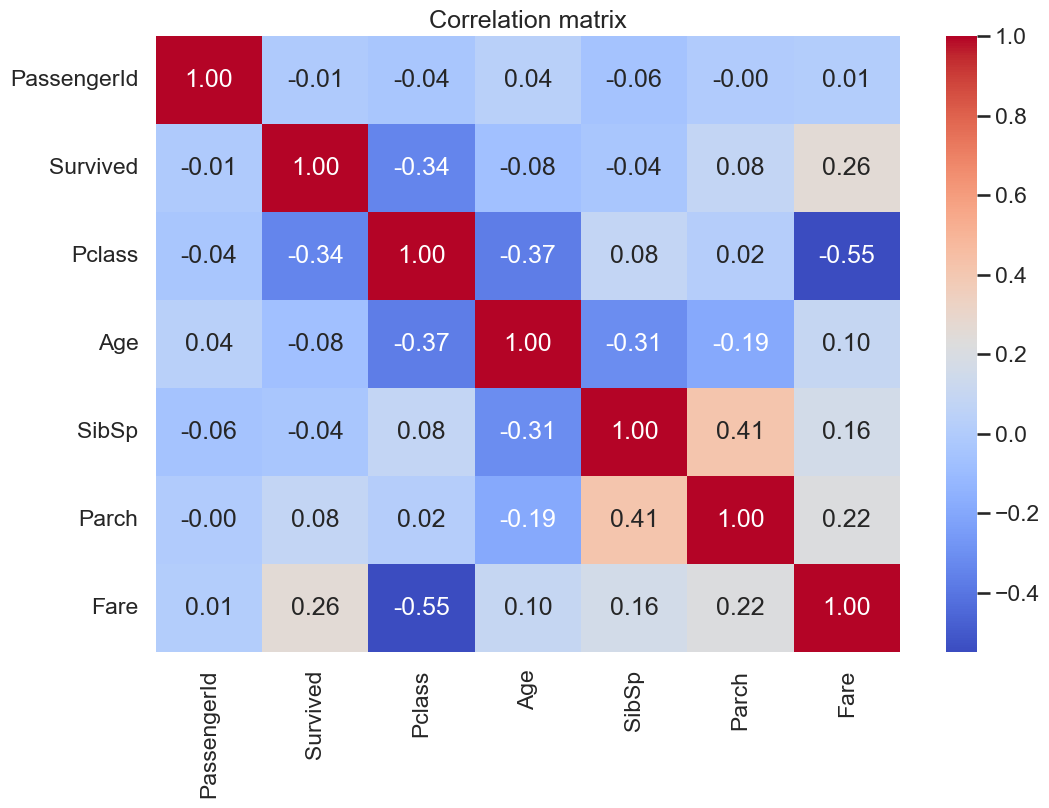

In [40]:
numeric_df = dataset.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()


ВИСНОВКИ

Завдання 3:
Вищий клас каюти пов'язаний із більшими шансами на виживання.
Старші пасажири частіше мають вищий клас.
Деякі пасажири подорожували з більшими родинами.
Вищий клас каюти має дорожчі квитки.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [6]:
def fill_missing_values(dataset, column_name, group_by_columns):
    median_values = dataset.groupby(group_by_columns)[column_name].transform('median')
    dataset[column_name] = dataset[column_name].fillna(median_values)
    return dataset

dataset_filled = fill_missing_values(dataset, 'Age', ['Sex'])

missing_values = dataset_filled.isnull().sum()
print("Missing values:", missing_values)


Missing values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


ВИСНОВКИ

Після застосування функції fill_missing_values до датасету за групою по статі і заповнення пропущених значень медіаною для кожної групи, було успішно виправлено пропущені значення в колонці 'Age'.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





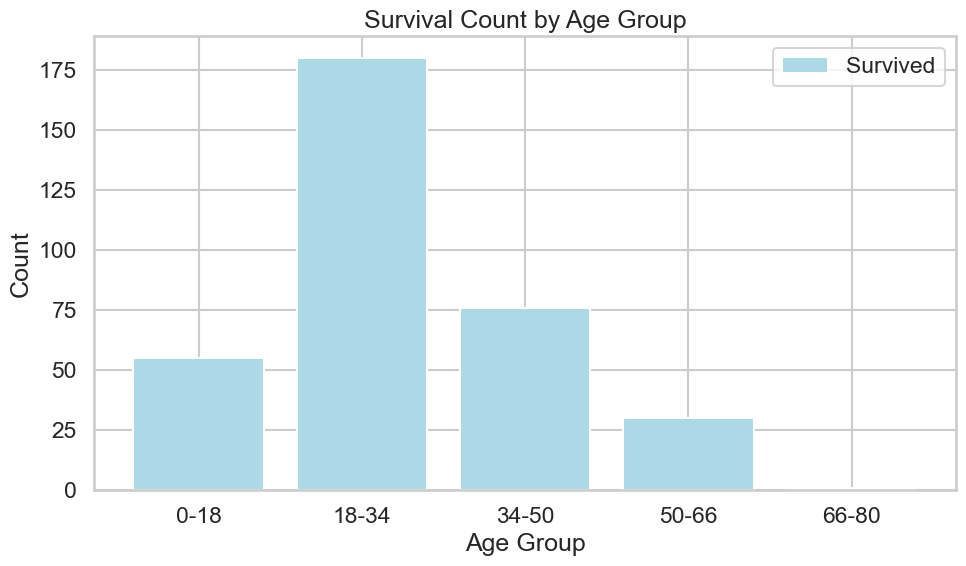

In [7]:
dataset['Age_bin'] = pd.cut(dataset['Age'], bins=5, labels=False)

survived_age = dataset[dataset['Survived'] == 1]['Age_bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(range(len(survived_age)), survived_age.values, color='lightblue', label='Survived')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Count by Age Group')
plt.xticks(range(len(survived_age)), ['0-18', '18-34', '34-50', '50-66', '66-80'])
plt.legend()
plt.tight_layout()
plt.show()


ВИСНОВКИ

Найбільше вижило пасажирів віком від 16 до 32 років.
Найменше вижило пасажирів віком від 48 до 64 років.
Графік дозволяє візуалізувати залежність між віком пасажирів та їхнім виживанням.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [11]:
dataset['Fare_quartile'] = pd.qcut(dataset['Fare'], 4, labels=False)
survived_by_quartile = dataset.groupby('Fare_quartile')['Survived'].mean()

print("Survived:", survived_by_quartile)

Fare_quartile
0    0.197309
1    0.303571
2    0.454955
3    0.581081
Name: Survived, dtype: float64


ВИСНОВКИ

Результати підтверджують гіпотезу про те, що кількість виживших пасажирів змінюється для різних квартильних значень змінної Fare.


***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [10]:
dataset['Family_size'] = dataset['Parch'] + dataset['SibSp']
dataset['Alone'] = (dataset['Family_size'] == 0).astype(int)

print(dataset.groupby('Family_size')['Survived'].mean())
print(dataset.groupby('Alone')['Survived'].mean())



Family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64
Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


ВИСНОВКИ

Пасажири з різними кількостями членів сім'ї мали різний відсоток виживання. Найвищий відсоток виживших був у пасажирів з 3 членами сім'ї, тоді як одні пасажири (без сім'ї) мали менший відсоток виживання.
Наявність сім'ї (Alone = 0) впливає на більший відсоток виживання порівняно з тими, хто подорожував самотньо (Alone = 1).

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [12]:
columns_to_drop = dataset.isnull().mean()[dataset.isnull().mean() > 50].index.tolist() + ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_cleaned = dataset.drop(columns=columns_to_drop)

print(df_cleaned.head())


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Age_bin  \
0         0       3    male  22.0      1      0   7.2500        S        1   
1         1       1  female  38.0      1      0  71.2833        C        2   
2         1       3  female  26.0      0      0   7.9250        S        1   
3         1       1  female  35.0      1      0  53.1000        S        2   
4         0       3    male  35.0      0      0   8.0500        S        2   

   Family_size  Alone  
0            1      0  
1            1      0  
2            0      1  
3            1      0  
4            0      1  


ВИСНОВКИ

PassengerId: Унікальний ідентифікатор пасажира, не впливає на аналіз даних.
Name, Ticket, Cabin: Не мають прямого впливу на виживання та містять багато пропущених значень.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [13]:
dataset['Sex'] = dataset['Sex'].map(lambda x: 1 if x == 'female' else 0)

dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

dataset['Title'] = dataset['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip()).map({
    'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3,
})

print(dataset[['Sex', 'Embarked', 'Title']])


     Sex  Embarked  Title
0      0       0.0    0.0
1      1       1.0    2.0
2      1       0.0    1.0
3      1       0.0    2.0
4      0       0.0    0.0
..   ...       ...    ...
886    0       0.0    NaN
887    1       0.0    1.0
888    1       0.0    1.0
889    0       1.0    0.0
890    0       2.0    0.0

[891 rows x 3 columns]


ВИСНОВКИ

Змінна Sex тепер представлена у вигляді бінарного значення, де 1 відповідає 'female', а 0 - іншим значенням.
Змінна Embarked тепер відображається числово: 'S' - 0, 'C' - 1, 'Q' - 2.
Змінна Title була винесена із імен користувачів і тепер кодується числово: 'Mr' - 0, 'Miss' - 1, 'Mrs' - 2, 'Master' - 3.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



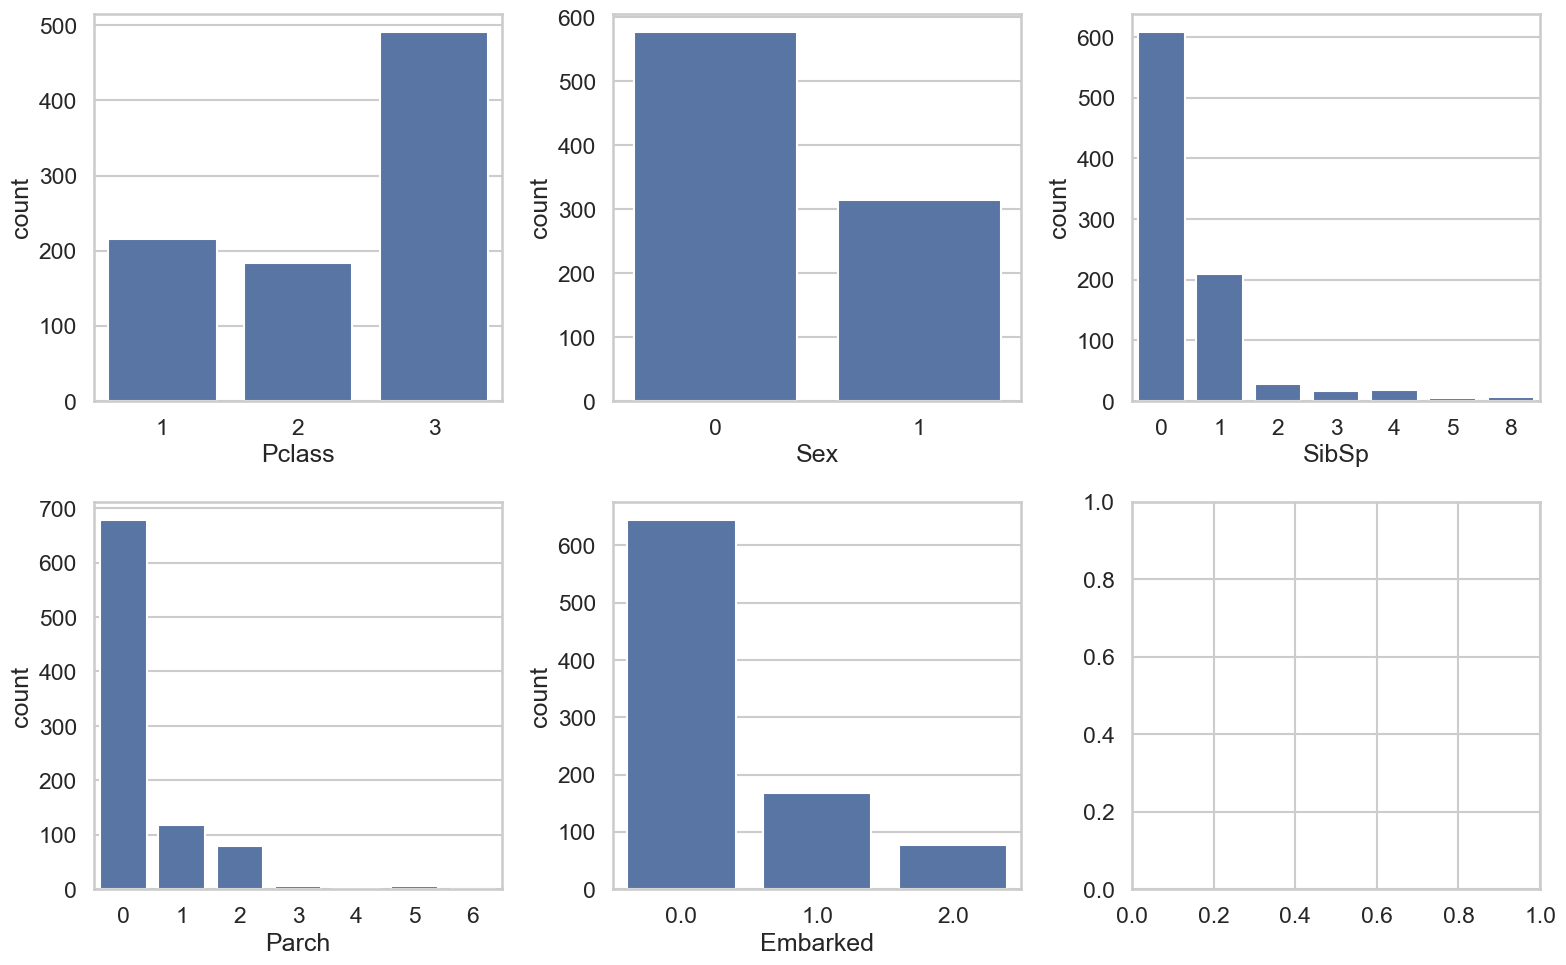

In [19]:
categorical_variables = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for ax, var in zip(axes.flatten(), categorical_variables):
    sns.countplot(x=var, data=dataset, ax=ax)

plt.tight_layout()
plt.show()

ВИСНОВКИ

Pclass: більше всього пасажирів у третьому класі.
Sex: приблизно удвічі більше чоловіків, ніж жінок.
SibSp: більшість пасажирів подорожували без родичів або разом з одним.
Parch: більшість пасажирів мали або жодних батьків або дітей, або разом з одним.
Embarked: більше всього пасажирів посадилися в Southampton


***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

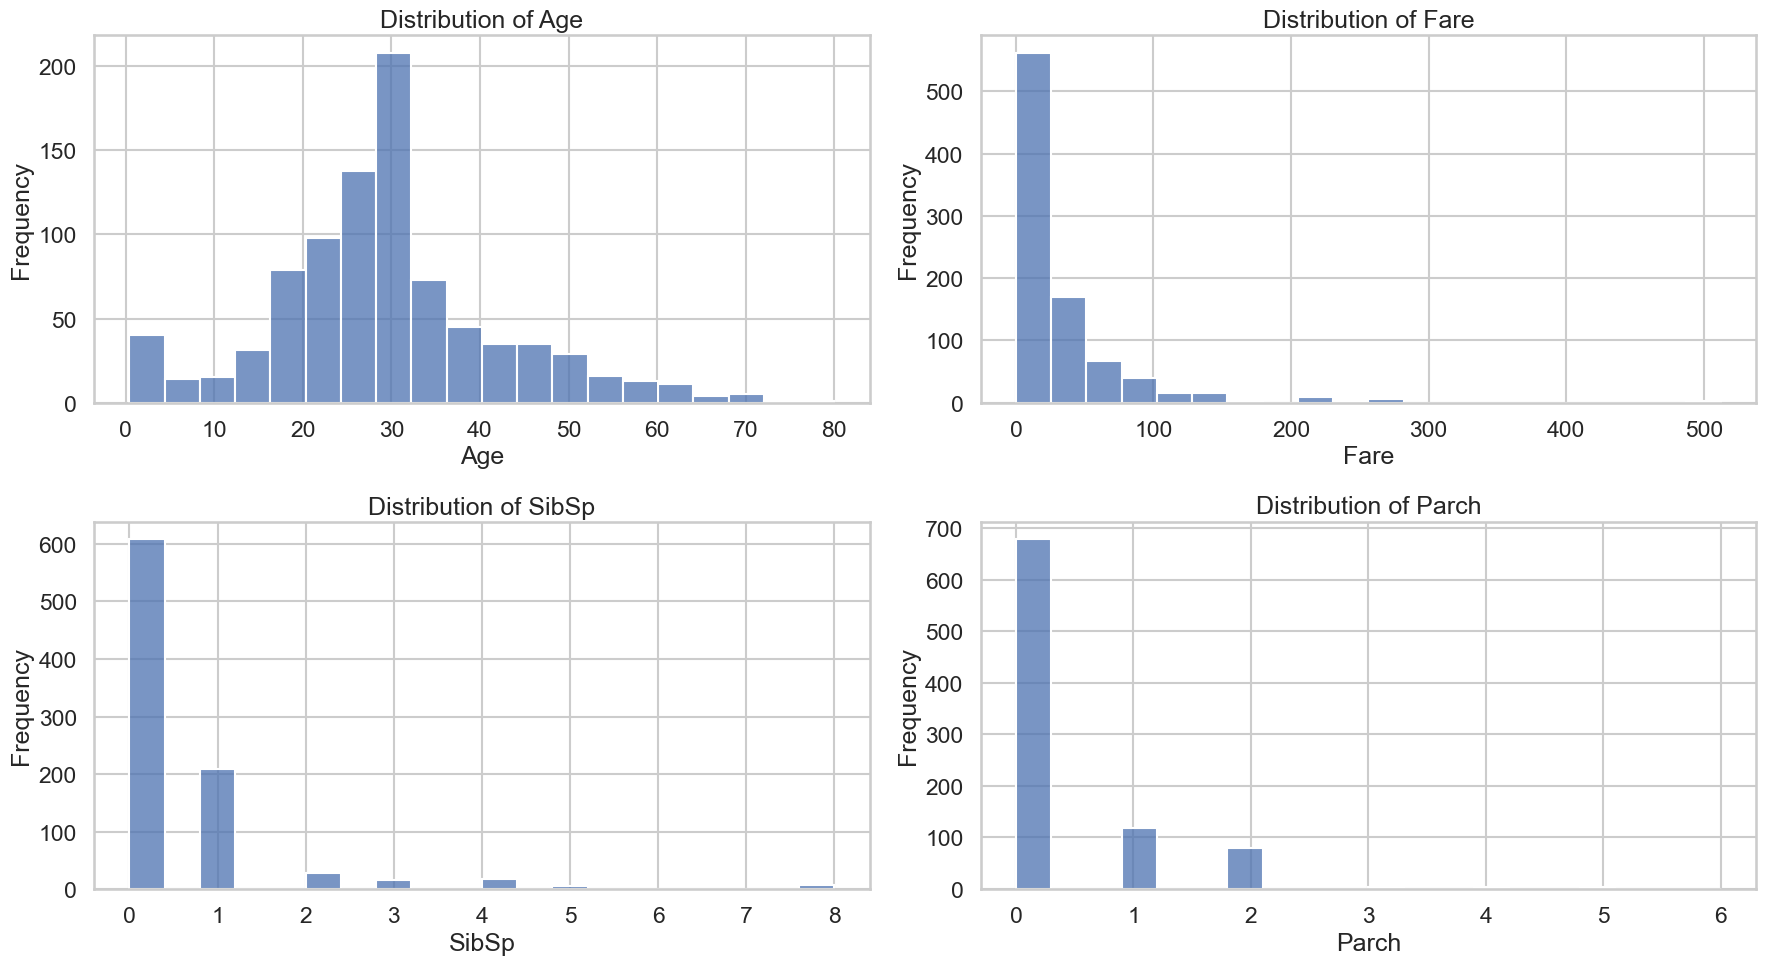

In [23]:
numeric_variables = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

for ax, var in zip(axes.flatten(), numeric_variables):
    sns.histplot(dataset[var], bins=20, ax=ax)
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


ВИСНОВКИ

Age: більшість пасажирів мають вік від 20 до 40 років.
Fare: більшість квитків мають низьку вартість, але є й дорогі.
SibSp: більшість пасажирів подорожували без родичів або з одним.
Parch: більшість пасажирів мали або жодних батьків або дітей на борту.


##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

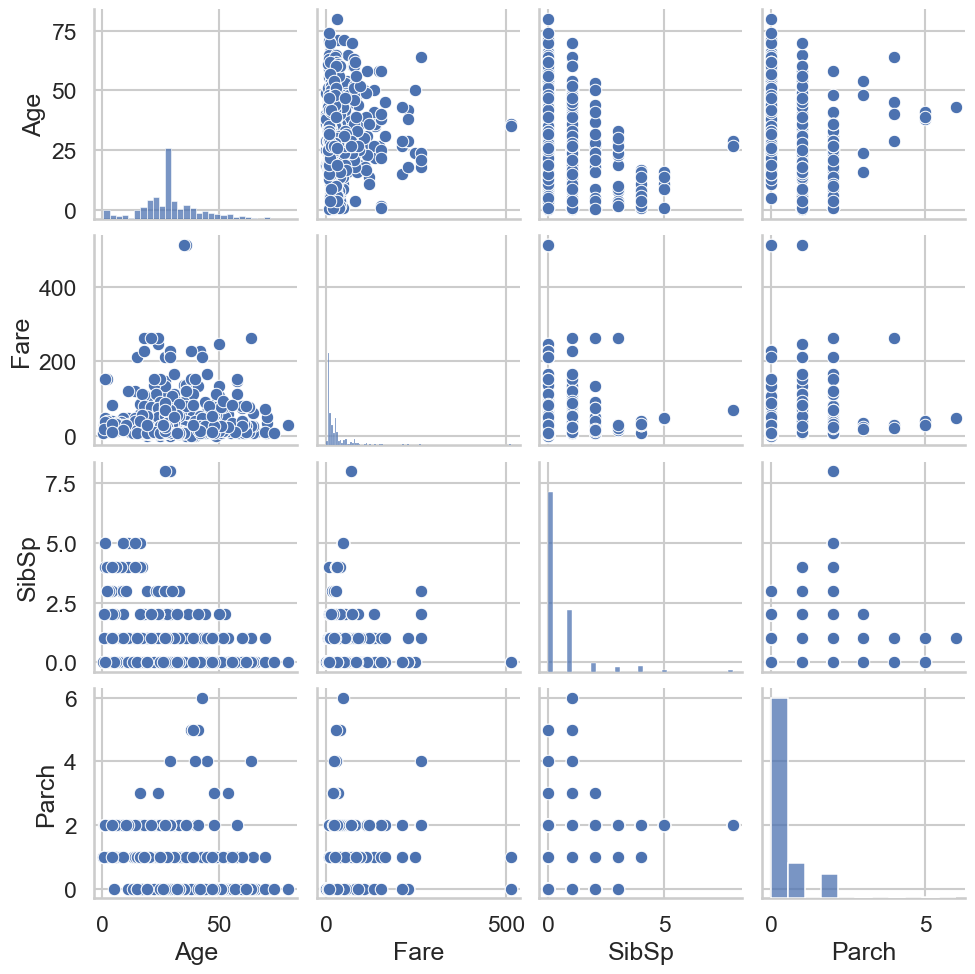

In [27]:
numeric_variables = ['Age', 'Fare', 'SibSp', 'Parch']

sns.pairplot(dataset[numeric_variables], diag_kind='hist')
plt.show()


ВИСНОВКИ
Age і Fare: Молоді люди зазвичай мають нижчі вартості квитків, але серед старших пасажирів можуть бути як низькі, так і високі ціни квитків.

Age і SibSp/Parch: Деякі пасажири з більшою кількістю родичів можуть бути молодшими, але це не є загальним правилом.

Fare і SibSp/Parch: Пасажири з більшою кількістю родичів на борту, як правило, мають нижчі вартості квитків, але існують вийнятки.


Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.